In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = np.load('mnist.npz')

print("Training data(X)", data['train_x'].shape, data['train_x'].dtype)
print("Training data(Y)", data['train_y'].shape, data['train_y'].dtype)
print("Test data(X)", data['test_x'].shape, data['test_x'].dtype)
print("Test data(Y)", data['test_y'].shape, data['test_y'].dtype)

Training data(X) (60000, 28, 28) float32
Training data(Y) (60000,) uint8
Test data(X) (10000, 28, 28) float32
Test data(Y) (10000,) uint8


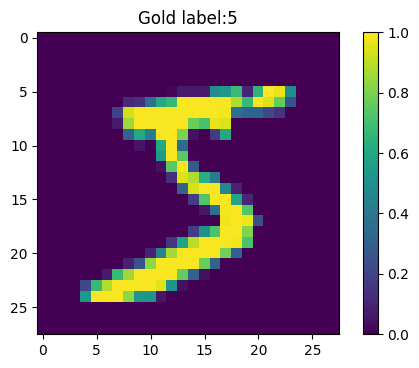

In [5]:
i = 0
x = data['train_x'][i]
y = data['train_y'][i]

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax.set_title(f'Gold label:{y}')
im = ax.imshow(x)
fig.colorbar(im)
plt.show()

In [6]:
x[6][15]

0.99215686

In [7]:
def images_to_vectors(X):
    X = np.reshape(X, (len(X), -1))
    return np.c_[X, np.ones(len(X))]

In [8]:
X_train = images_to_vectors(data['train_x'])
X_test  = images_to_vectors(data['test_x'])

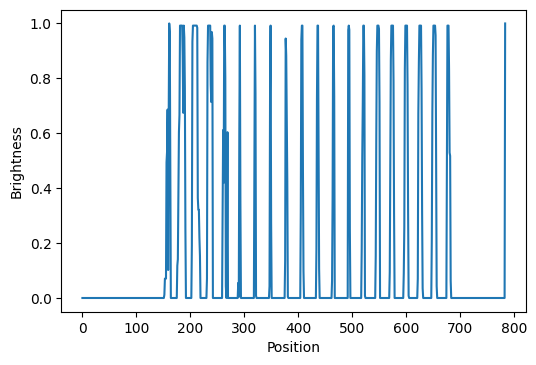

In [9]:
x = X_train[i]

fig = plt.figure(dpi=100)
ax = fig.add_subplot(111)
ax.plot(range(len(x)), x)
ax.set_xlabel('Position')
ax.set_ylabel('Brightness')
plt.show()

In [10]:
x[204]

0.9333333373069763

In [11]:
def softmax(a):
    ea = np.exp(a)
    return ea / ea.sum()

In [12]:
a = np.array([0.1, -0.2, 0.3, -0.4, 0.5])
softmax(a)

array([0.19760595, 0.14639009, 0.24135645, 0.11985407, 0.29479344])

In [13]:
a = np.array(np.array([1000, 0]))
softmax(a)

/var/folders/31/34b84x3d0pq7msq7m4v_8v7r0000gn/T/ipykernel_6162/1334177726.py:2: RuntimeWarning: overflow encountered in exp
  ea = np.exp(a)
/var/folders/31/34b84x3d0pq7msq7m4v_8v7r0000gn/T/ipykernel_6162/1334177726.py:3: RuntimeWarning: invalid value encountered in divide
  return ea / ea.sum()


array([nan,  0.])

In [14]:
def softmax(a):
    ea = np.exp(a - np.max(a))
    return ea / ea.sum()

In [15]:
a = np.array([1000, 0])
softmax(a)

array([1., 0.])

In [16]:
from sklearn.linear_model import SGDClassifier

def image_to_vector(X):
    return np.reshape(X, (len(X), -1))

data = np.load('mnist.npz')
Xtrain = image_to_vector(data['train_x'])
Ytrain = data['train_y']
Xtest = image_to_vector(data['test_x'])
Ytest = data['test_y']

model = SGDClassifier(loss='log_loss')
model.fit(Xtrain, Ytrain)

SGDClassifier(loss='log_loss')

In [17]:
model.predict(Xtest[0:1])

array([7], dtype=uint8)

In [18]:
Ytest[0]

7

In [19]:
model.predict_proba(Xtest[0:1])

array([[7.47526721e-05, 5.65138072e-10, 3.32883689e-04, 2.02551476e-02,
        3.49626112e-06, 3.23646509e-04, 1.62481443e-08, 9.78436709e-01,
        7.95182398e-05, 4.93829151e-04]])

In [20]:
model.score(Xtest, Ytest)

0.9156

In [21]:
from sklearn.metrics import confusion_matrix
Ytest_pred = model.predict(Xtest)
confusion_matrix(Ytest, Ytest_pred)

array([[ 960,    0,    1,    2,    0,    4,    6,    4,    1,    2],
       [   0, 1114,    2,    1,    0,    1,    4,    1,   12,    0],
       [   7,   10,  906,   20,   13,    6,   12,   14,   38,    6],
       [   5,    1,   17,  908,    2,   30,    2,   13,   25,    7],
       [   1,    3,    5,    2,  933,    1,    3,    1,    9,   24],
       [  10,    3,    0,   35,   12,  774,   14,    5,   32,    7],
       [  12,    3,    7,    2,    9,   18,  900,    1,    6,    0],
       [   3,   12,   17,    5,    7,    3,    1,  955,    4,   21],
       [  14,   14,    5,   16,   14,   30,    7,   13,  854,    7],
       [   8,    9,    1,   12,   52,   14,    0,   46,   15,  852]])

/var/folders/31/34b84x3d0pq7msq7m4v_8v7r0000gn/T/ipykernel_6162/3144728913.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


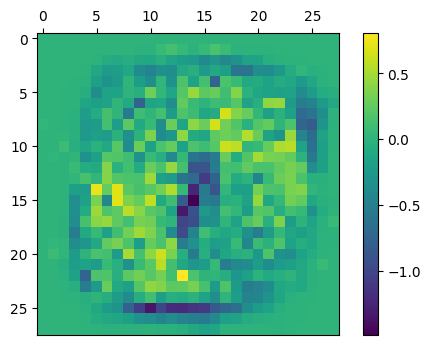

In [22]:
w = model.coef_[0].reshape(28, 28)

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.invert_yaxis()
ax.xaxis.tick_top()
im = ax.imshow(w)
fig.colorbar(im, ax=ax)
fig.show()

In [23]:
import numpy as np

class LogisticClassifier():
    
    def __init__(self):
        self.w = None
    
    def softmax(self, a):
        ea = np.exp(a - np.max(a))
        return ea / ea.sum()
    
    def sigmoid(self, a):
        return (0 <= a) * (1 / (1 + np.exp(-a))) + (0 > a) * (1. - 1 / (1 + np.exp(a)))
    
    def train(self, X, Y, eta=1.0, alpha=1e-6, epoch=40000, eps=1e-6):
        N = X.shape[0]
        self.w = np.random.uniform(size=(X.shape[-1], 1))
        for t in range(epoch):
            i = np.random.choice(N)
            if Y[i] == 1:
                delta = (1 - self.predict_proba(X[i])) * X[i]
            else:
                delta = -self.predict_proba(X[i]) * X[i]
            delta = delta.reshape((-1, 1)) - 2 * alpha * self.w / N
            if np.sum(np.abs(delta)) < eps:
                break
            self.w += eta * delta
        return self
    
    def predict_proba(self, X):
        y = self.softmax(X @ self.w)
        return y.flatten()

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

In [24]:
Xtrain = data['train_x']
Ytrain = data['train_y']
Xtest = data['test_x']
Ytest = data['test_y']


In [25]:
def images_to_vectors(X):
    X = np.reshape(X, (len(X), -1))
    return np.c_[X, np.ones(len(X))]

In [26]:
Xtrain = images_to_vectors(Xtrain)
Ytrain = images_to_vectors(Ytrain)

In [27]:
model = LogisticClassifier().train(Xtrain[0], Ytrain[0])

IndexError: index 265 is out of bounds for axis 0 with size 2

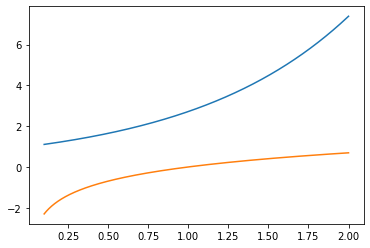

In [ ]:
from cmath import log


fig, ax = plt.subplots()
xs = np.linspace(0.1, 2, 1000)
y = np.exp(xs)
y2 = np.log(xs)
ax.plot(xs, y)
ax.plot(xs, y2)